In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Load CSV
df = pd.read_csv('data.csv')

In [3]:

# Split features and target
X = df.iloc[:, :-1].values  # all columns except last
y = df.iloc[:, -1].values   # last column (target)

# Standardize features
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
y = y.reshape(-1,1)  # Reshape y to column vector


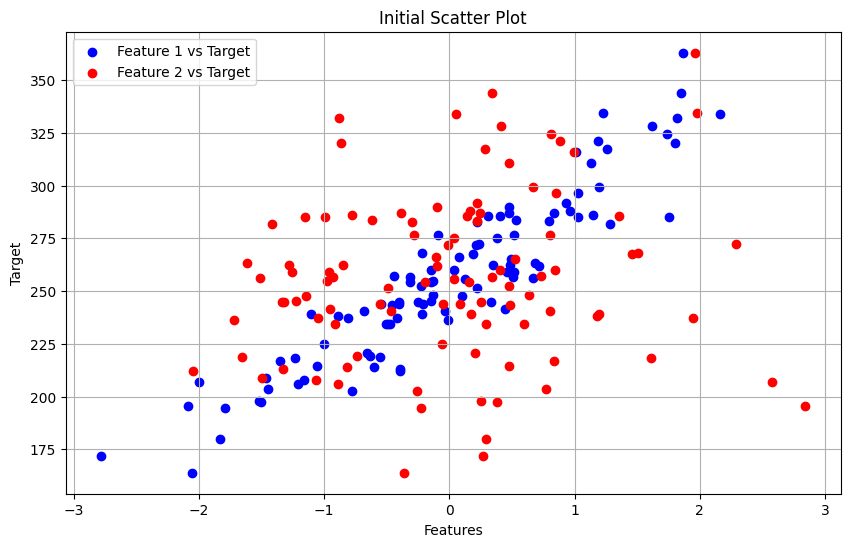

In [4]:

# Plot features vs target
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], y, color='blue', label='Feature 1 vs Target')
plt.scatter(X[:, 1], y, color='red', label='Feature 2 vs Target')
plt.xlabel('Features')
plt.ylabel('Target')
plt.title('Initial Scatter Plot')
plt.legend()
plt.grid(True)
plt.show()


In [5]:
m, n = X.shape

w = np.random.randn(n, 1)
b = np.random.randn() 

In [6]:
y_pred_initial = np.dot(X, w) + b


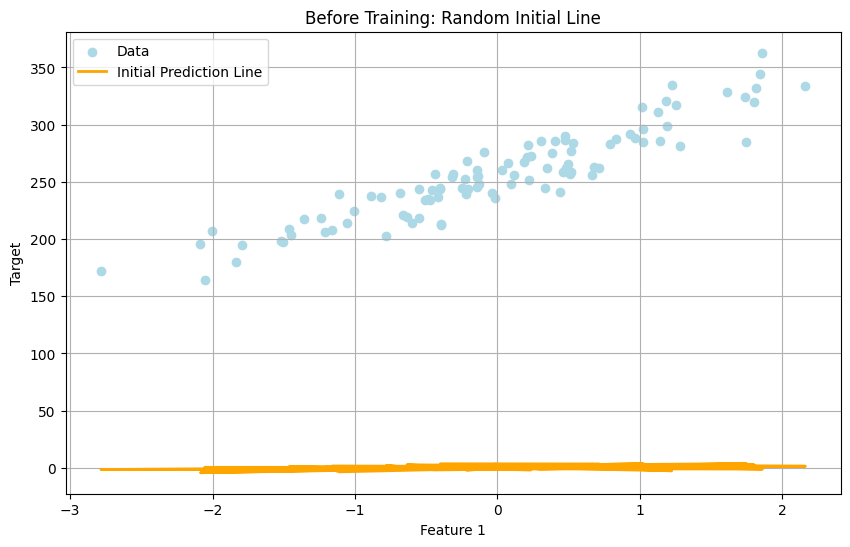

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], y, color='lightblue', label='Data')
plt.plot(X[:, 0], y_pred_initial, color='orange', linewidth=2, label='Initial Prediction Line')
plt.xlabel('Feature 1')
plt.ylabel('Target')
plt.title('Before Training: Random Initial Line')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
def predict(X, w, b):
    return np.dot(X, w) + b

def compute_cost(X, y, w, b):
    m = X.shape[0]
    y_pred = predict(X, w, b)
    return (1/(2*m)) * np.sum((y_pred - y)**2)

def compute_gradient(X, y, w, b):
    m = X.shape[0]
    y_pred = predict(X, w, b)
    error = y_pred - y
    dj_w = (1/m) * np.dot(X.T, error)     
    dj_b = (1/m) * np.sum(error)
    return dj_w, dj_b

def gradient_descent(X, y, w, b, learning_rate=0.01, epochs=1000):
    cost_history = []
    for i in range(epochs):
        dj_w, dj_b = compute_gradient(X, y, w, b)
        w -= learning_rate * dj_w
        b -= learning_rate * dj_b
        cost = compute_cost(X, y, w, b)
        cost_history.append(cost)
        if i % 100 == 0:
            print(f"Epoch {i}: Cost {cost:.4f}")
    return w, b, cost_history


In [9]:
w, b, history = gradient_descent(X, y, w, b, learning_rate=0.01, epochs=1000)


Epoch 0: Cost 32813.5737
Epoch 100: Cost 4456.0242
Epoch 200: Cost 636.3947
Epoch 300: Cost 119.2516
Epoch 400: Cost 48.7506
Epoch 500: Cost 39.0448
Epoch 600: Cost 37.6898
Epoch 700: Cost 37.4968
Epoch 800: Cost 37.4686
Epoch 900: Cost 37.4643


In [10]:
y_pred_final = predict(X, w, b)


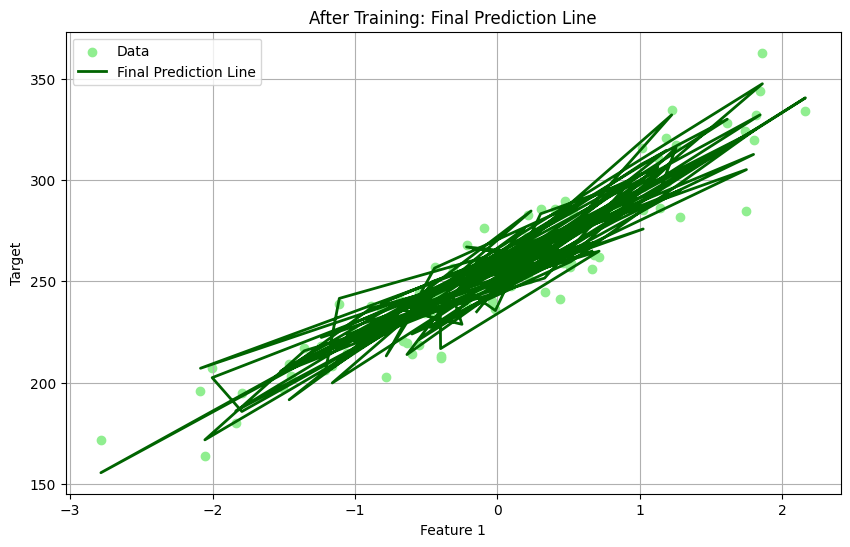

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], y, color='lightgreen', label='Data')
plt.plot(X[:, 0], y_pred_final, color='darkgreen', linewidth=2, label='Final Prediction Line')
plt.xlabel('Feature 1')
plt.ylabel('Target')
plt.title('After Training: Final Prediction Line')
plt.legend()
plt.grid(True)
plt.show()


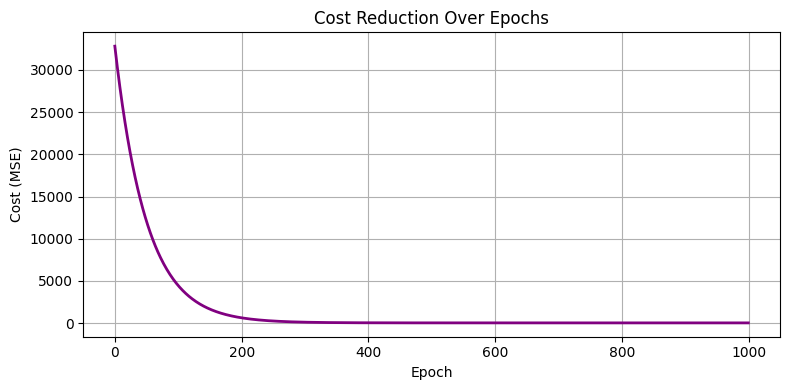

In [12]:
plt.figure(figsize=(8, 4))
plt.plot(range(len(history)), history, color='purple', linewidth=2)
plt.title("Cost Reduction Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Cost (MSE)")
plt.grid(True)
plt.tight_layout()
plt.show()